In [2]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
# load dataset
df = read_csv('MASTER.csv', header=0, index_col=0)

# specify columns to plot

In [3]:
df

,DELINGQUENCY,Unemployment,MORTGAGE30,House_Sold,AVGPRICE,Monthly_supply_of_new_home
DATE,,,,,,
1/1/1991,3.09,6.4,9.6375,401,151100,9.4
4/1/1991,3.17,6.7,9.4925,508,148200,7.3
7/1/1991,3.23,6.8,9.5750,511,145400,7.1
10/1/1991,3.29,7.0,8.8550,524,144400,6.7
1/1/1992,3.12,7.3,8.4320,676,144500,5.2
...,...,...,...,...,...,...
4/1/2021,2.48,6.0,3.0600,809,440600,4.7
7/1/2021,2.31,5.4,2.8680,726,473000,6.0
10/1/2021,2.28,4.6,3.0675,671,497300,6.9


In [4]:

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf

In [5]:
#tools for visualization
from sklearn import tree
import matplotlib.pyplot as plt

In [6]:
import random
import numpy as np
random.seed(42)

In [7]:
#metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1

In [8]:
X=df[['Unemployment','MORTGAGE30','House_Sold','AVGPRICE','Monthly_supply_of_new_home']]

In [9]:
Y= df['DELINGQUENCY']

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [13]:
params_dist = {
	#'criterion': ['gini', 'entropy'],
	'max_depth': [4, 6, 8, 10, 12, 14, 16],
	'max_leaf_nodes': [1000, 2000, 3000],
	'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,20, 30, 40, 50],
	'min_samples_split': [1,2,3,4,5,6,7,8,9,10,20,30, 40, 50]
}

In [14]:
dtr = DecisionTreeRegressor()
random_search = RandomizedSearchCV(dtr, params_dist, cv=5)
random_search.fit(X_train, Y_train)
tuned_dtr = random_search.best_estimator_
tuned_dtr.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=3000, min_samples_leaf=5,
                      min_samples_split=9)

In [15]:
print('MSE on train:', mse(Y_train, tuned_dtr.predict(X_train)))
print('MSE on test:', mse(Y_test, tuned_dtr.predict(X_test)))
print('Accuracy on Train:',tuned_dtr.score(X_train, Y_train))
print('Accuracy on test:',tuned_dtr.score(X_test, Y_test))


MSE on train: 0.3470590416666668
MSE on test: 0.3716330051892553
Accuracy on Train: 0.9596503968392375
Accuracy on test: 0.9476190175184707


In [16]:
column_names = list(X.columns.values)

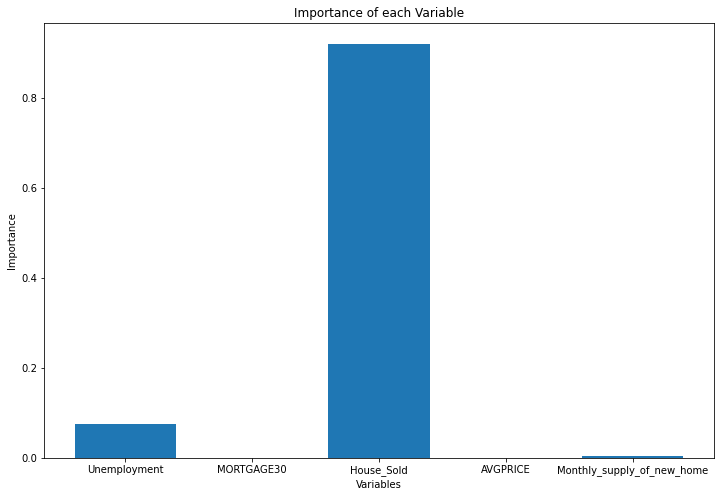

In [17]:
figbar = plt.figure(figsize=(12, 8))
plt.bar(column_names,np.squeeze(np.abs(tuned_dtr.feature_importances_)))
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.title("Importance of each Variable")
plt.show()

In [18]:
figbar.savefig("bar.png")

In [19]:
text_representation = tree.export_text(tuned_dtr)
print(text_representation)


|--- feature_2 <= 476.50
|   |--- feature_0 <= 6.90
|   |   |--- value: [6.40]
|   |--- feature_0 >  6.90
|   |   |--- feature_0 <= 8.10
|   |   |   |--- value: [8.80]
|   |   |--- feature_0 >  8.10
|   |   |   |--- feature_0 <= 9.05
|   |   |   |   |--- value: [10.02]
|   |   |   |--- feature_0 >  9.05
|   |   |   |   |--- value: [10.54]
|--- feature_2 >  476.50
|   |--- feature_2 <= 579.00
|   |   |--- feature_2 <= 519.50
|   |   |   |--- value: [5.13]
|   |   |--- feature_2 >  519.50
|   |   |   |--- value: [3.73]
|   |--- feature_2 >  579.00
|   |   |--- feature_2 <= 686.00
|   |   |   |--- feature_4 <= 5.75
|   |   |   |   |--- value: [3.35]
|   |   |   |--- feature_4 >  5.75
|   |   |   |   |--- value: [2.39]
|   |   |--- feature_2 >  686.00
|   |   |   |--- feature_2 <= 1075.50
|   |   |   |   |--- value: [2.25]
|   |   |   |--- feature_2 >  1075.50
|   |   |   |   |--- value: [1.59]



In [20]:
fig = plt.figure(figsize=(140,140))
_ = tree.plot_tree(tuned_dtr, 
                   feature_names=column_names)


In [21]:
fig.savefig("decistion_tree.png")


In [22]:
df = read_csv('MASTERCLASSIFIER.csv', header=0, index_col=0)

In [23]:
df.head

<bound method NDFrame.head of            DELINGQUENCY  Unemployment  MORTGAGE30  House_Sold  AVGPRICE  \
DATE                                                                      
1/1/1991           3.09           6.4      9.6375         401    151100   
4/1/1991           3.17           6.7      9.4925         508    148200   
7/1/1991           3.23           6.8      9.5750         511    145400   
10/1/1991          3.29           7.0      8.8550         524    144400   
1/1/1992           3.12           7.3      8.4320         676    144500   
...                 ...           ...         ...         ...       ...   
4/1/2021           2.48           6.0      3.0600         809    440600   
7/1/2021           2.31           5.4      2.8680         726    473000   
10/1/2021          2.28           4.6      3.0675         671    497300   
1/1/2022           2.09           4.0      3.4450         831    514100   
4/1/2022           1.96           3.6      4.9825         619    52750

In [24]:
X=df[['DELINGQUENCY','Unemployment','MORTGAGE30','House_Sold','AVGPRICE','Monthly_supply_of_new_home']]
Y=df["Recession"]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [31]:
print('Precision on train:', precision(Y_train, dtc.predict(X_train), average='micro'))
print('Precision on test:', precision(Y_test, dtc.predict(X_test), average='micro'))
print('Precision on train:', recall(Y_train, dtc.predict(X_train), average='micro'))
print('Precision on test:', recall(Y_test, dtc.predict(X_test), average='micro'))

Precision on train: 1.0
Precision on test: 0.8947368421052632
Precision on train: 1.0
Precision on test: 0.8947368421052632


In [32]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-32-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [33]:
display(Y_train)

DATE
4/1/2021     no              
7/1/1993     no              
10/1/2019    About to Crash  
1/1/2014     no              
4/1/2013     no              
1/1/2005     no              
4/1/1997     no              
10/1/2017    no              
7/1/1998     no              
7/1/2015     no              
4/1/1994     no              
1/1/2013     no              
4/1/2012     no              
4/1/2003     no              
7/1/2011     no              
4/1/2015     no              
4/1/2011     no              
10/1/2006    no              
1/1/1993     no              
4/1/2006     no              
1/1/2001     no              
7/1/1999     no              
7/1/2019     no              
4/1/1998     no              
10/1/1997    no              
7/1/2004     no              
10/1/1996    no              
4/1/2000     no              
4/1/2010     no              
7/1/2005     no              
7/1/2000     no              
10/1/2007    yes             
4/1/1993     no              
7/1/2

In [34]:
print('F1-score on train:', f1(Y_train, dtc.predict(X_train), average='micro'))
print('F1-score on test:', f1(Y_test, dtc.predict(X_test), average='micro'))

F1-score on train: 1.0
F1-score on test: 0.8947368421052632


<BarContainer object of 6 artists>

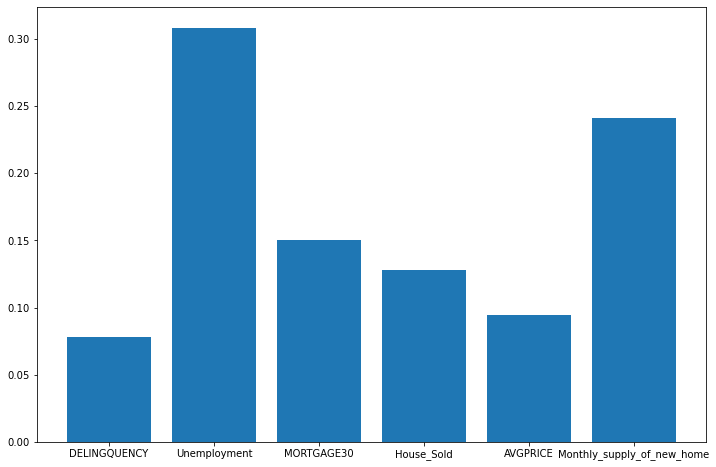

In [35]:
#let's check features importances
figbar=plt.figure(figsize=(12, 8))
plt.bar(list(X.columns.values), np.squeeze(np.abs(dtc.feature_importances_)))

In [36]:
figbar.savefig("decistion_Classifier_bar.png")

In [37]:
fig = plt.figure(figsize=(140,140))
_ = tree.plot_tree(dtc, 
                   feature_names=list(X.columns.values))


In [38]:
fig.savefig("decistion_Classifier.png")